In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('gm_2008_region.csv')
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [6]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


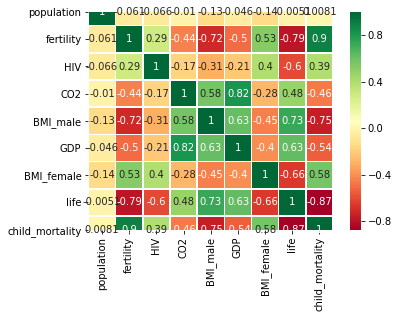

In [9]:
sns.heatmap(df.corr(),square=True,cmap='RdYlGn',annot=True, linewidth=0.5)

In [10]:
# Creating the features X and target y
X= df.drop(['life', 'Region'], axis=1)
y= df.loc[:, 'life']

In [11]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (139, 8)
Shape of y: (139,)


In [16]:
# Splitting the data to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [17]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (97, 8)
Shape of X_test: (42, 8)
Shape of y_train: (97,)
Shape of y_test: (42,)


In [20]:
from sklearn.linear_model import LinearRegression
reg_lin= LinearRegression()
reg_lin

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Fitting the regressor to the training data
reg_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Prediction the unseen data(X_test)
y_pred=reg_lin.predict(X_test)

In [23]:
y_pred

array([78.22476033, 76.32286591, 78.11463688, 74.36665748, 79.2625374 ,
       72.18965031, 75.98785171, 57.59385352, 71.97219207, 83.78024008,
       56.383019  , 69.69058366, 77.14682292, 76.65996849, 61.23497078,
       57.12924003, 73.40533539, 64.60616308, 73.22346087, 55.04586513,
       72.95342691, 75.87870111, 79.76531584, 75.93035588, 76.53733245,
       74.44603022, 65.10798347, 75.21486156, 74.35934048, 54.03683439,
       49.61079213, 70.61239351, 78.29638405, 73.74462406, 75.38918595,
       72.12541819, 63.99913147, 59.93630246, 72.66140226, 69.32398079,
       55.49930871, 78.94810155])

In [24]:
# Finding the accuracy
print("R^2: {}".format(reg_lin.score(X_test,y_test)))

R^2: 0.7741619244133646


In [25]:
# Create a linear regressor
reg_4_cv =LinearRegression()
reg_4_cv

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Compute 4_fold cross validation scores
from sklearn.model_selection import cross_val_score

cv_scores_4 = cross_val_score(reg_4_cv, X, y, cv = 4)
cv_scores_4

array([0.85705307, 0.8277541 , 0.87465085, 0.93264074])

In [27]:
print('Average 4-Fold CV score:{}'.format(np.mean(cv_scores_4)))

Average 4-Fold CV score:0.8730246919338989


In [29]:
# Create a linear regression
reg_cv =LinearRegression()

# 3-Folds Cross Validation scores
cv_scores_3 = cross_val_score(reg_cv, X, y, cv = 3)
print('Average 3-Fold CV score:{}'.format(np.mean(cv_scores_3)))

Average 3-Fold CV score:0.8718712782622262


In [30]:
# 10-Folds Cross Validation scores
cv_scores_10 = cross_val_score(reg_cv, X, y, cv = 10)
print('Average 10-Fold CV score:{}'.format(np.mean(cv_scores_10)))

Average 10-Fold CV score:0.8436128620131267


In [33]:
# Import Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.4, normalize = True)
Lasso

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [34]:
# Fit the regression
Lasso.fit(X,y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [36]:
# Finding the accuracy
print("R^2: {}".format(Lasso.score(X,y)))

R^2: 0.4948632173434634


In [38]:
# Compute the coefficients
lasso_coef=Lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


In [39]:
x_features = X.columns
x_features 

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

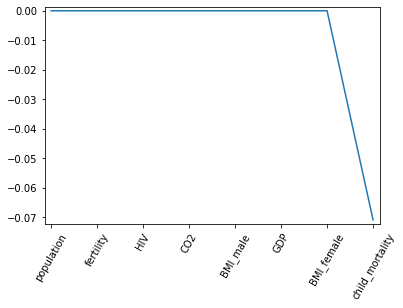

In [41]:
#  Plotting the coefficients
plt.plot(range(len(x_features)), lasso_coef)
plt.xticks(range(len(df.columns)),x_features.values, rotation=60)
plt.margins(0.02)
plt.show()
